## 1. Importing, sorting and selecting data 

In [ ]:
import os

# Print the current working directory
print(os.getcwd())


In [4]:
import pandas as pd

In [ ]:
# the books, ratings and users files are open sources from Kaggle.
path_6 = "Main_Datasets/v1_Books.csv"
path_7 = "Main_Datasets/v1_Ratings.csv"
path_8 = "Main_Datasets/v1_Users.csv"

df_book_v1 = pd.read_csv(path_6)
df_rating_v1 = pd.read_csv(path_7)
df_user_v1 = pd.read_csv(path_8)


In [10]:
df_book_v1

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [5]:
pd.set_option("display.max_colwidth", None)

## 2. Explorative Data Analysis 

In [11]:
df_user_v1

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [12]:
df_rating_v1

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


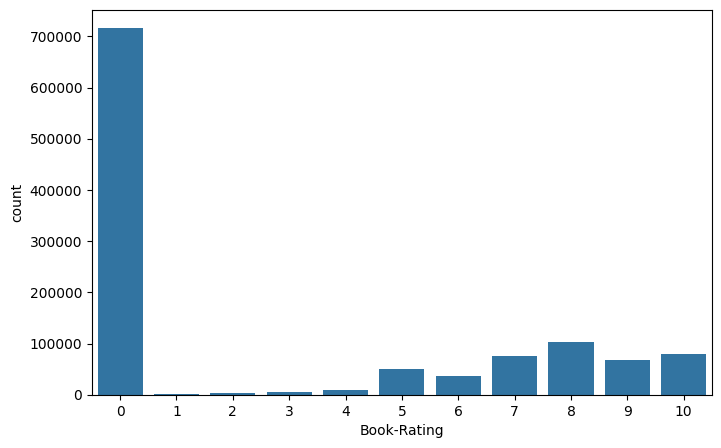

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Displaying the distribution of book ratings
plt.figure(figsize=(8,5))
sns.countplot(x='Book-Rating', data=df_rating_v1)
plt.show()

**Obervation findings from the plot above:**
 
Given that 60% of the values in the Book-Rating column are 0 in the dataset, this likely implies that a significant portion of users did not rate the books explicitly. In many book recommendation systems, such as those used by platforms like Goodreads, Amazon, or BookCrossing, a 0 rating can serve as a placeholder for "no rating" or indicate implicit feedback, where the user might have interacted with the item but without providing a concrete rating.

In such cases:

Explicit ratings are the scores from 1 to 10, reflecting the user’s evaluation of the book.
0 ratings usually indicate the absence of explicit feedback and should be treated differently in data analysis, such as for recommendation systems or statistical analysis.
If it is to build models (e.g., for recommendation systems), I may want to:

Treat 0 ratings as missing or implicit feedback.

**Approach to handle with Zero-Rating**

I chose to filtering Out 0s
If you are building a simple user-based or item-based collaborative filtering recommendation model using techniques like KNN, you may want to filter out the 0s and only keep the ratings between 1 and 10. This is because 0s provide no clear signal of user preferences.


In [16]:
df_rating_v1.loc[df_rating_v1["Book-Rating"] == 0, :]

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
2,276727,0446520802,0
5,276733,2080674722,0
10,276746,0425115801,0
11,276746,0449006522,0
...,...,...,...
1149769,276704,059032120X,0
1149770,276704,0679752714,0
1149772,276704,080410526X,0
1149774,276704,0876044011,0


In [17]:
df_rating_without0 = df_rating_v1[df_rating_v1['Book-Rating'] != 0].copy()
df_rating_without0.reset_index(drop=True, inplace=True)

In [24]:
df_rating_without0.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

## 3. Collaborative Filtering using cosine-similarity of book-ratings

In [26]:
ratings_with_names = pd.merge(df_book_v1, df_rating_v1, on='ISBN')

In [102]:
ratings_with_names.head(20)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0
5,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,67544,8
6,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,85526,0
7,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,96054,0
8,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,116866,9
9,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,123629,9


In [28]:
#books on which more than 200 people rating on it
x = ratings_with_names.groupby('User-ID').count()['Book-Rating']>200
rated_users = x[x].index
Filtered_users = ratings_with_names[ratings_with_names['User-ID'].isin(rated_users)]

In [29]:
#users who have rated more than 50 books
y = Filtered_users['Book-Title'].value_counts()>=50
famous_books = y[y].index
Final_ratings = Filtered_users[Filtered_users['Book-Title'].isin(famous_books)]

In [30]:
pt = Final_ratings.pivot_table(index= 'Book-Title', columns=('User-ID'), values='Book-Rating')

In [31]:
pt.fillna(0, inplace=True)
pt.head()

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
pt.head(20)

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Case of Need,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0
"A Child Called \It\"": One Child's Courage to Survive""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Civil Action,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Day Late and a Dollar Short,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
#import sklearn library for cosine difference
from sklearn.metrics.pairwise import cosine_similarity

In [33]:
#similar vectors
similarity_score = cosine_similarity(pt)

In [36]:
import numpy as np

In [37]:
#function of top 10 recommended books
def recommend(book_name):
    index = np.where(pt.index == book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_score[index])), key=lambda x:x[1], reverse = True)[1:11]
    for i in similar_items:
        print(pt.index[i[0]])  

In [39]:
recommend("1984")

Animal Farm
The Handmaid's Tale
Brave New World
The Vampire Lestat (Vampire Chronicles, Book II)
The Hours : A Novel
Fahrenheit 451
The Catcher in the Rye
Naked
The Hundred Secret Senses
The Drawing of the Three (The Dark Tower, Book 2)


In [109]:
# Another version with author and images 

def recommends(book_name):
    # Convert both book_name and pt.index to lowercase to avoid case sensitivity issues
    book_name = book_name.strip().lower()
    pt.index = pt.index.str.strip().str.lower()

    # Clean book titles in Books dataframe and drop duplicates
    df_book_v1['Book-Title'] = df_book_v1['Book-Title'].str.strip().str.lower()
    df_book_v1.drop_duplicates(subset='Book-Title', inplace=True)

    # Check if the book exists in the index
    if book_name not in pt.index:
        print(f"'{book_name}' not found in the book list.")
        return

    ## index fetch
    index = np.where(pt.index == book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_score[index])), key=lambda x: x[1], reverse=True)[1:8]

    data = []
    for i in similar_items:
        item = []
        temp_df = df_book_v1[df_book_v1['Book-Title'] == pt.index[i[0]]]

        # Debugging output to check for duplicates
        print(temp_df)

        if not temp_df.empty:
            item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
            item.extend(list(temp_df.drop_duplicates('Book-Author')['Book-Author'].values))
            item.extend(list(temp_df.drop_duplicates('Image-URL-M')['Image-URL-M'].values))
            data.append(item)

    return data

In [110]:
recommends("2nd chance")

           ISBN       Book-Title      Book-Author Year-Of-Publication  \
205  0316693006  four blind mice  James Patterson                2002   

         Publisher                                        Image-URL-S  \
205  Little, Brown  http://images.amazon.com/images/P/0316693006.0...   

                                           Image-URL-M  \
205  http://images.amazon.com/images/P/0316693006.0...   

                                           Image-URL-L  
205  http://images.amazon.com/images/P/0316693006.0...  
           ISBN         Book-Title   Book-Author Year-Of-Publication  \
648  0553578693  the next accident  LISA GARDNER                2002   

    Publisher                                        Image-URL-S  \
648    Bantam  http://images.amazon.com/images/P/0553578693.0...   

                                           Image-URL-M  \
648  http://images.amazon.com/images/P/0553578693.0...   

                                           Image-URL-L  
648  http://images.

[['four blind mice',
  'James Patterson',
  'http://images.amazon.com/images/P/0316693006.01.MZZZZZZZ.jpg'],
 ['the next accident',
  'LISA GARDNER',
  'http://images.amazon.com/images/P/0553578693.01.MZZZZZZZ.jpg'],
 ['violets are blue',
  'James Patterson',
  'http://images.amazon.com/images/P/0446611212.01.MZZZZZZZ.jpg'],
 ['the murder book',
  'Jonathan Kellerman',
  'http://images.amazon.com/images/P/0345413903.01.MZZZZZZZ.jpg'],
 ['flesh and blood',
  'Jonathan Kellerman',
  'http://images.amazon.com/images/P/0679459626.01.MZZZZZZZ.jpg'],
 ['mortal prey',
  'John Sandford',
  'http://images.amazon.com/images/P/0425189864.01.MZZZZZZZ.jpg'],
 ['cat &amp; mouse (alex cross novels)',
  'James Patterson',
  'http://images.amazon.com/images/P/0446606189.01.MZZZZZZZ.jpg']]

## 4. Content-based filtering using book title and book description 

In [40]:
# By content-based filtering, the other dataset from Kaggle was used, because this dataset contains detailed description information
path = "Data_of_example6/GR-Books.csv"

books = pd.read_csv(path)

In [ ]:
books.columns = ['Desc', 'unamed', 'author', 'genre', 'url', 'rating', 'title']

# Dropping the unnamed column
books.drop('unamed', inplace=True, axis=1)


In [119]:
books.tail(50)

,Desc,author,genre,url,rating,title,word_count,cleaned_desc
2401,Larry Darrell is a young American in search of...,W. Somerset Maugham,Non-Fiction,https://i.gr-assets.com/images/S/compressed.ph...,4.19,The Razor's Edge,84,larry darrell young american search absolute p...
2402,• Pride and Prejudice was only half the story ...,Jo Baker,Non-Fiction,https://i.gr-assets.com/images/S/compressed.ph...,3.63,Longbourn,166,pride prejudice half story elizabeth bennet wa...
2403,"Dear Reader,You have undoubtedly picked up thi...",Lemony Snicket,Non-Fiction,https://i.gr-assets.com/images/S/compressed.ph...,3.95,The Vile Village,141,dear reader you undoubtedly picked book mistak...
2404,This is the original cover edition of ISBN:\t0...,Flannery O'Connor,Non-Fiction,https://i.gr-assets.com/images/S/compressed.ph...,4.40,The Complete Stories,303,original cover edition isbn 0374515360 isbn13 ...
2405,"At first, only a few things are known about th...",Arthur C. Clarke,Non-Fiction,https://i.gr-assets.com/images/S/compressed.ph...,4.09,Rendezvous with Rama,107,first things known celestial object astronomer...
2406,While Eisenstein documented the forces of tota...,Don DeLillo,Non-Fiction,https://i.gr-assets.com/images/S/compressed.ph...,3.92,Underworld,410,eisenstein documented forces totalitarianism s...
2407,Arch-swindler Moist Van Lipwig never believed ...,Terry Pratchett,Non-Fiction,https://i.gr-assets.com/images/S/compressed.ph...,4.38,Going Postal,258,arch swindler moist van lipwig never believed ...
2408,The Mulvaneys of High Point Farm in Mt. Ephrai...,Joyce Carol Oates,Non-Fiction,https://i.gr-assets.com/images/S/compressed.ph...,3.73,We Were the Mulvaneys,137,mulvaneys high point farm mt ephraim new york ...
2409,Follow a motley crew on an exciting journey th...,Becky Chambers,Non-Fiction,https://i.gr-assets.com/images/S/compressed.ph...,4.17,"The Long Way to a Small, Angry Planet",241,follow motley crew exciting journey spaceand o...
2410,"Lonely, depressed, Vermont transplant Mirabell...",Steve Martin,Non-Fiction,https://i.gr-assets.com/images/S/compressed.ph...,3.42,Shopgirl,117,lonely depressed vermont transplant mirabelle ...


<Axes: title={'center': 'Word count distribution for book descriptions'}, ylabel='Frequency'>

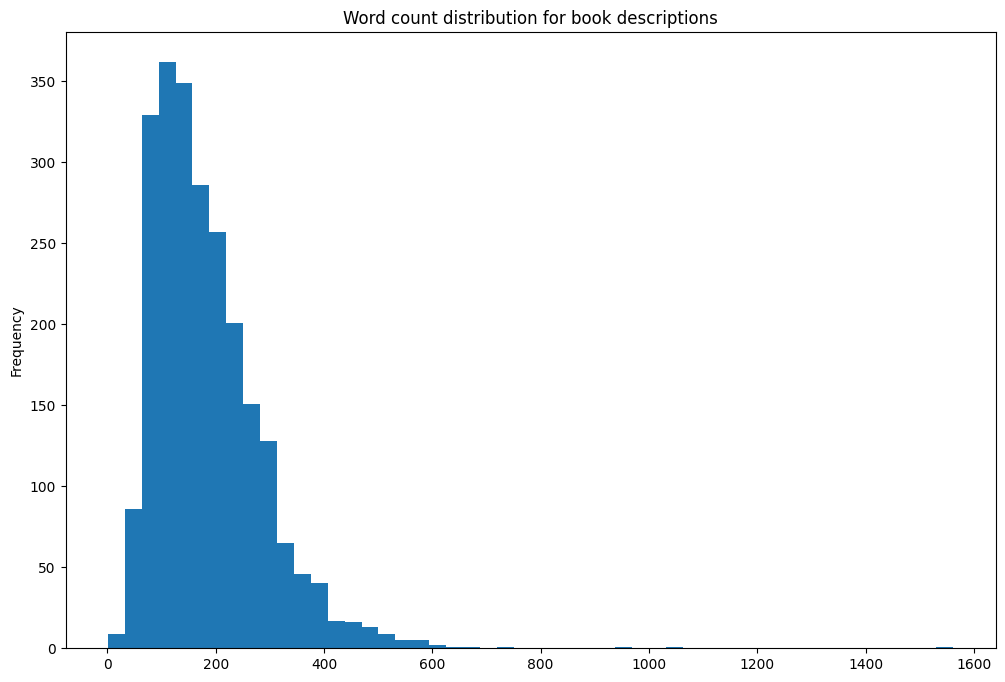

In [42]:
books["word_count"] = books['Desc'].apply(lambda x: len(str(x).split()))

books['word_count'].plot(
    kind="hist",
    bins=50,
    figsize = (12, 8),
    title="Word count distribution for book descriptions"
)

In [43]:
# Natural language tool kit
from nltk.corpus import stopwords

# Vectorizing
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import string
import random

# For recommendation
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser
from matplotlib import pyplot
from gensim.models import KeyedVectors

In [45]:
%pip install textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 3.0 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [55]:
%pip install nltk


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [65]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package punkt to /Users/minwan.li/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/minwan.li/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/minwan.li/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/minwan.li/nltk_data...


[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

[nltk_data] Downloading package punkt to /Users/minwan.li/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/minwan.li/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


       word  pos
0         0   CD
1        We  PRP
2      know  VBP
3      that   DT
4     power   NN
..      ...  ...
98     Desc  NNP
99   Length  NNP
100    2382   CD
101   dtype   NN
102  object   NN

[103 rows x 2 columns]


<Axes: title={'center': 'Top 20 Part-of-speech tagging for comments'}, xlabel='pos'>

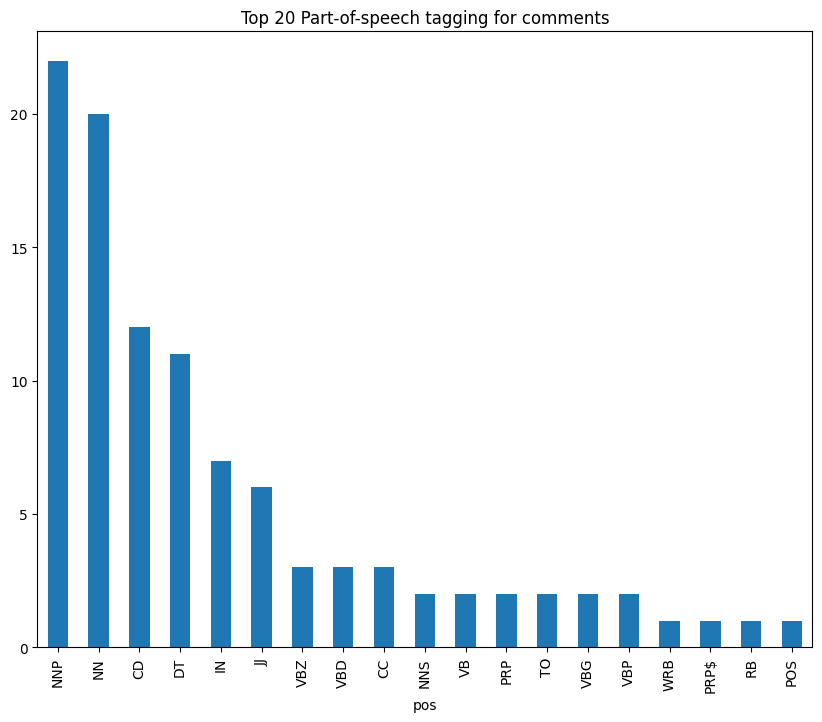

In [66]:
from textblob import TextBlob
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

blob = TextBlob(str(books['Desc']))
pos_books = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
print(pos_books)
pos_books = pos_books.pos.value_counts()[:20]
pos_books.plot(kind = 'bar', figsize=(10, 8), title = "Top 20 Part-of-speech tagging for comments")

<Axes: title={'center': 'Bigram disribution for the top 20 words in the book description'}, xlabel='bigram'>

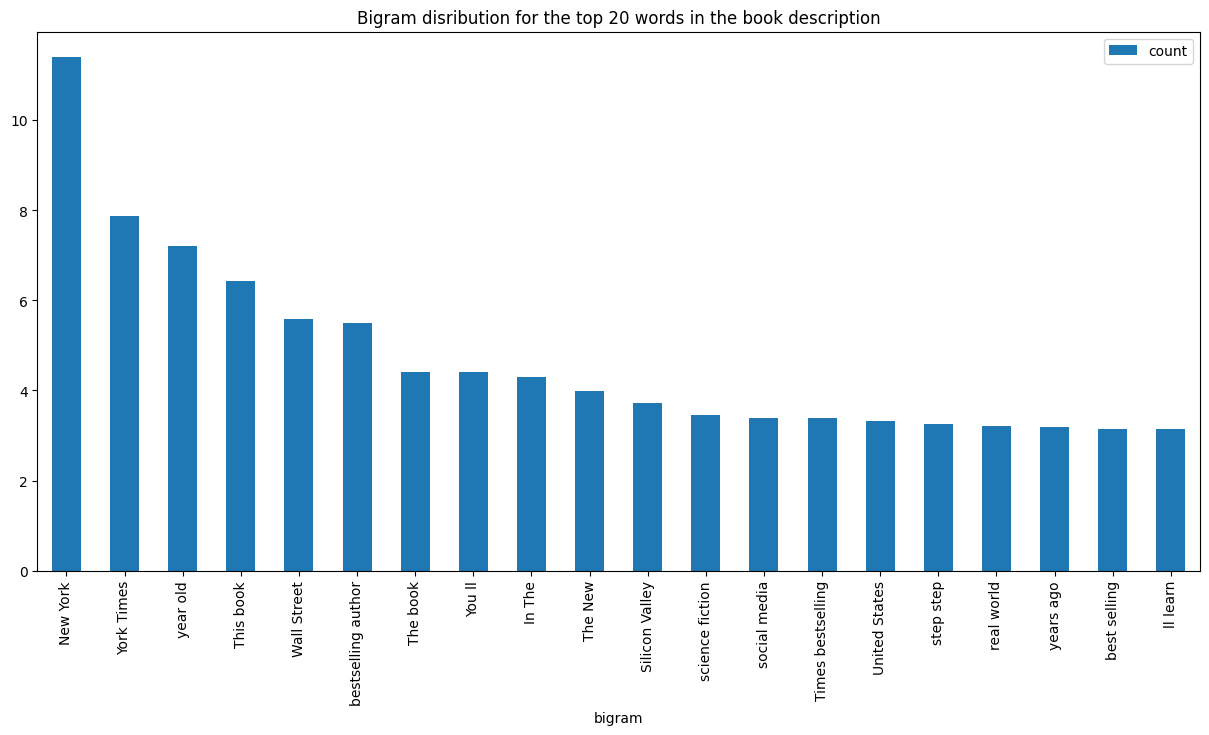

In [67]:
# Converting text descriptions into vectors using TF-IDF using Bigram
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(books['Desc'])
total_words = tfidf_matrix.sum(axis=0) 

#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)

#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 

#Taking first 20 records
bigram = bigram.head(20)

#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Bigram disribution for the top 20 words in the book description", figsize = (15,7), )

In [69]:
nltk.download('stopwords')

# Function for removing NonAscii characters
def _removeNonAscii(s):
    return "".join(i for i in s if  ord(i)<128)

# Function for converting into lower case
def make_lower_case(text):
    return text.lower()

# Function for removing stop words
def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

# Function for removing punctuation
def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

#Function for removing the html tags
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

# Applying all the functions in description and storing as a cleaned_desc
books['cleaned_desc'] = books['Desc'].apply(_removeNonAscii)
books['cleaned_desc'] = books.cleaned_desc.apply(func = make_lower_case)
books['cleaned_desc'] = books.cleaned_desc.apply(func = remove_stop_words)
books['cleaned_desc'] = books.cleaned_desc.apply(func=remove_punctuation)
books['cleaned_desc'] = books.cleaned_desc.apply(func=remove_html)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/minwan.li/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [49]:
# Function for recommending books based on Book title. It takes book title and genre as an input.
def recommendByTitle(title, genre):
    
    # Matching the genre with the dataset and reset the index
    data = books.loc[books['genre'] == genre]  
    data.reset_index(level = 0, inplace = True) 
  
    # Convert the index into series
    indices = pd.Series(data.index, index = data['title'])
    
    #Converting the book title into vectors and used bigram
    tf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 1, stop_words='english')
    tfidf_matrix = tf.fit_transform(data['title'])
    
    # Calculating the similarity measures based on Cosine Similarity
    sg = cosine_similarity(tfidf_matrix, tfidf_matrix)
    
    # Get the index corresponding to original_title
       
    idx = indices[title]
    # Get the pairwsie similarity scores 
    sig = list(enumerate(sg[idx]))
    
    # Sort the books
    sig = sorted(sig, key=lambda x: x[1], reverse=True)
    
    # Scores of the 5 most similar books 
    sig = sig[1:6]
    
    # Book indicies
    movie_indices = [i[0] for i in sig]
   
    # Top 5 book recommendation
    rec = data[['title', 'url']].iloc[movie_indices]
       
    # It reads the top 5 recommend book
    
    print("TOP 5 Recommended Books are... \n")
    
    index = 1
    for i in movie_indices:
        title = rec['title'][i]
        print(index ," ", title)
        index += 1

In [50]:
recommendByTitle("Harry Potter and the Order of the Phoenix", "Non-Fiction")

TOP 5 Recommended Books are... 

1   Harry Potter and the Goblet of Fire
2   Harry Potter and the Sorcerer's Stone
3   Harry Potter and the Chamber of Secrets
4   Harry Potter and the Prisoner of Azkaban
5   Harry Potter and the Deathly Hallows


In [70]:
# Function for recommending books based on Book title. It takes book title and genre as an input.
def recommendByDesc(title, genre):
    
    # Matching the genre with the dataset and reset the index
    data = books.loc[books['genre'] == genre]  
    data.reset_index(level = 0, inplace = True) 
  
    # Convert the index into series
    indices = pd.Series(data.index, index = data['title'])
    
    #Converting the book description into vectors and used bigram
    tf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 1, stop_words='english')
    tfidf_matrix = tf.fit_transform(data['cleaned_desc'])
    
    # Calculating the similarity measures based on Cosine Similarity
    sg = cosine_similarity(tfidf_matrix, tfidf_matrix)
    
    # Get the index corresponding to original_title
       
    idx = indices[title]
    
    # Get the pairwsie similarity scores 
    sig = list(enumerate(sg[idx]))
    
    # Sort the books
    sig = sorted(sig, key=lambda x: x[1], reverse=True)
    
    # Scores of the 5 most similar books 
    sig = sig[1:6]
    
    # Book indicies
    movie_indices = [i[0] for i in sig]
   
    # Top 5 book recommendation
    rec = data[['title', 'url']].iloc[movie_indices]
    
    # It reads the top 5 recommend
    
    print("TOP 5 Recommended Books are... \n")
    
    index = 1
    for i in movie_indices:
        title = rec['title'][i]
        print(index ," ", title)
        index += 1

In [75]:
recommendByDesc("The Four Pillars of Investing", "Business")

TOP 5 Recommended Books are... 

1   The Third Door: The Wild Quest to Uncover How the World's Most Successful People Launched Their Careers
2   Abundance: The Future Is Better Than You Think
3   The Sales Bible: The Ultimate Sales Resource
4   The End of Power: From Boardrooms to Battlefields and Churches to States, Why Being In Charge Isn't What It Used to Be
5   Console Wars: Sega, Nintendo, and the Battle that Defined a Generation


## 6. Philosophy special shelf

In [99]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# Function to scrape a single page of Goodreads
def scrape_goodreads_page(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/93.0.4577.63 Safari/537.36'
    }
    
    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()  # Will raise an HTTPError for bad responses (4xx or 5xx)
    except requests.exceptions.HTTPError as err:
        print(f"HTTP error occurred: {err}")
        return []
    except Exception as err:
        print(f"Other error occurred: {err}")
        return []
    
    soup = BeautifulSoup(response.text, 'html.parser')

    books = []

    # Find the "mainContentContainer" div
    main_content_container = soup.find('div', class_='mainContentContainer')
    if not main_content_container:
        print("No mainContentContainer found")
        return []

    # Find the "mainContentFloat" div
    main_content_float = main_content_container.find('div', class_='mainContentFloat')
    if not main_content_float:
        print("No mainContentFloat found")
        return []

    # Find the "leftContainer" div
    left_container = main_content_float.find('div', class_='leftContainer')
    if not left_container:
        print("No leftContainer found")
        return []

    # Find all the book containers (elementList divs) within the "leftContainer"
    book_list = left_container.find_all('div', class_='elementList')

    for book_div in book_list:
        # Get book title
        title_tag = book_div.find('a', class_='bookTitle')
        title = title_tag.get_text(strip=True) if title_tag else 'Unknown'

        # Get book author
        author_tag = book_div.find('a', class_='authorName')
        author = author_tag.get_text(strip=True) if author_tag else 'Unknown'

        # Get the greyText smallText span containing avg rating and rating count
        rating_info = book_div.find('span', class_='greyText smallText')
        if rating_info:
            rating_text = rating_info.get_text(strip=True)
            # Extract avg rating and rating count using string splitting
            rating_parts = rating_text.split('—')
            if len(rating_parts) >= 2:
                avg_rating = rating_parts[0].replace('avg rating ', '').strip()
                rating_count = rating_parts[1].replace('ratings', '').strip()
            else:
                avg_rating = 'No rating'
                rating_count = 'No ratings count'
        else:
            avg_rating = 'No rating'
            rating_count = 'No ratings count'
        # Get the image link
        image_tag = book_div.find('a', class_='leftAlignedImage').find('img')
        image_url = image_tag['src'] if image_tag else 'No image'

        # Append the information to the books list
        books.append([title, author, avg_rating, rating_count, image_url])

    return books

# Function to scrape multiple pages
def scrape_goodreads_pages(base_url, num_pages):
    all_books = []
    for page in range(1, num_pages + 1):
        print(f"Scraping page {page}...")
        url = f"{base_url}?page={page}"
        books_on_page = scrape_goodreads_page(url)
        if books_on_page:
            all_books.extend(books_on_page)
        time.sleep(3)  # Increase delay to avoid blocking

    return all_books

# Base URL for the Goodreads "Philosophy" shelf
base_url = 'https://www.goodreads.com/shelf/show/philosophy'

# Number of pages to scrape (Adjust based on how many pages you want to scrape)
num_pages = 50  # Change this according to your needs

# Scrape all pages
all_books = scrape_goodreads_pages(base_url, num_pages)

# Convert the data into a Pandas DataFrame
df = pd.DataFrame(all_books, columns=['Title', 'Author', 'Average Rating', 'Ratings Count', 'Image URL'])

# Save the data to a CSV file
df.to_csv('goodreads_philosophy_books.csv', index=False)

print(f"Scraped {len(all_books)} books and saved to goodreads_philosophy_books.csv")


Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...
Scraping page 25...
Scraping page 26...
Scraping page 27...
Scraping page 28...
Scraping page 29...
Scraping page 30...
Scraping page 31...
Scraping page 32...
Scraping page 33...
Scraping page 34...
Scraping page 35...
Scraping page 36...
Scraping page 37...
Scraping page 38...
Scraping page 39...
Scraping page 40...
Scraping page 41...
Scraping page 42...
Scraping page 43...
Scraping page 44...
Scraping page 45...
Scraping page 46...
Scraping page 47...
Scraping page 48...
Scraping page 49...
Scraping page 50...
Scraped 2

In [5]:
# Import and transform the file 
path_10 = "goodreads_philosophy_books.csv"
philosophy_books = pd.read_csv(path_10)

In [13]:
# Convert 'Ratings Count' to integer by removing commas and changing data type
philosophy_books['Ratings Count'] = philosophy_books['Ratings Count'].str.replace(',', '').astype(int)


In [15]:
philosophy_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           2500 non-null   object 
 1   Author          2500 non-null   object 
 2   Average Rating  2500 non-null   float64
 3   Ratings Count   2500 non-null   int64  
 4   Image URL       2500 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 97.8+ KB


**Most rated books vs. best rated books**

In [17]:
philosophy_books_best = philosophy_books.sort_values(by='Average Rating', ascending=False)
philosophy_books_most = philosophy_books.sort_values(by='Ratings Count', ascending=False)

In [21]:
philosophy_books_best = philosophy_books.sort_values(by='Average Rating', ascending=False).drop_duplicates(subset='Average Rating').head(20)

In [22]:
philosophy_books_best

,Title,Author,Average Rating,Ratings Count,Image URL
1355,Man’s Search for Meaning (Paperback),Viktor E. Frankl,4.37,753313,https://i.gr-assets.com/images/S/compressed.ph...
1261,Letters from a Stoic (Paperback),Seneca,4.34,45109,https://i.gr-assets.com/images/S/compressed.ph...
58,Tao Te Ching (Paperback),Lao Tzu,4.30,162825,https://i.gr-assets.com/images/S/compressed.ph...
500,Meditations (Paperback),Marcus Aurelius,4.28,271383,https://i.gr-assets.com/images/S/compressed.ph...
1137,The Art of Living: The Classical Manual on Vir...,Epictetus,4.24,27945,https://i.gr-assets.com/images/S/compressed.ph...
1942,The Prophet (Paperback),Kahlil Gibran,4.23,306839,https://i.gr-assets.com/images/S/compressed.ph...
1774,The Myth of Sisyphus and Other Essays (Paperback),Albert Camus,4.22,59457,https://i.gr-assets.com/images/S/compressed.ph...
2426,Apology (Paperback),Plato,4.20,58223,https://i.gr-assets.com/images/S/compressed.ph...
1520,The Myth of Sisyphus (Paperback),Albert Camus,4.18,67638,https://i.gr-assets.com/images/S/compressed.ph...
738,The Story of Philosophy: The Lives and Opinion...,Will Durant,4.15,17075,https://i.gr-assets.com/images/S/compressed.ph...


In [26]:
# Function to search by keywords in the 'Title'
def search_by_title(df, keyword):
    result = df[df['Title'].str.contains(keyword, case=False, na=False)].drop_duplicates()
    return result

# Function to search by 'Author'
def search_by_author(df, author_name):
    result = df[df['Author'].str.contains(author_name, case=False, na=False)].drop_duplicates()
    return result

In [29]:
author_search = search_by_author(philosophy_books, "Lao Tzu")

In [30]:
author_search

,Title,Author,Average Rating,Ratings Count,Image URL
8,Tao Te Ching (Paperback),Lao Tzu,4.3,162825,https://i.gr-assets.com/images/S/compressed.ph...
608,Tao Te Ching (Paperback),Lao Tzu,4.3,162826,https://i.gr-assets.com/images/S/compressed.ph...
